In [2]:
# IMPORT

import init
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import os

from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.vo.client import conesearch
from astropy import units as u

Read the Munifind file to get STDEV of all stars

In [3]:

# INDEX MEAN_MAG STDEV GOODPOINTS
def read_munifind(filename):
    df = pd.read_csv(filename, skiprows=[1], sep=' ')
    df.rename(columns = {'INDEX':'STAR'}, inplace = True)
    print("max goodpoints:", df['GOODPOINTS'].max())
    print("min stdev:", df['STDEV'].min())
    print(df.sort_values('STDEV').head())
    return df

df = read_munifind(init.basedir+'munifind.txt')

max goodpoints: 893
min stdev: 0.00572
     STAR  MEAN_MAG    STDEV  GOODPOINTS
48     61   1.48797  0.00572         893
23     30   0.98170  0.00738         864
143   171   2.47843  0.00776         889
41     48   1.27522  0.00789         831
64     77   1.72525  0.00791         884


index 2675 is STAR          3403.00000
MEAN_MAG         5.49711
STDEV            0.04419
GOODPOINTS     677.00000
Name: 2675, dtype: float64


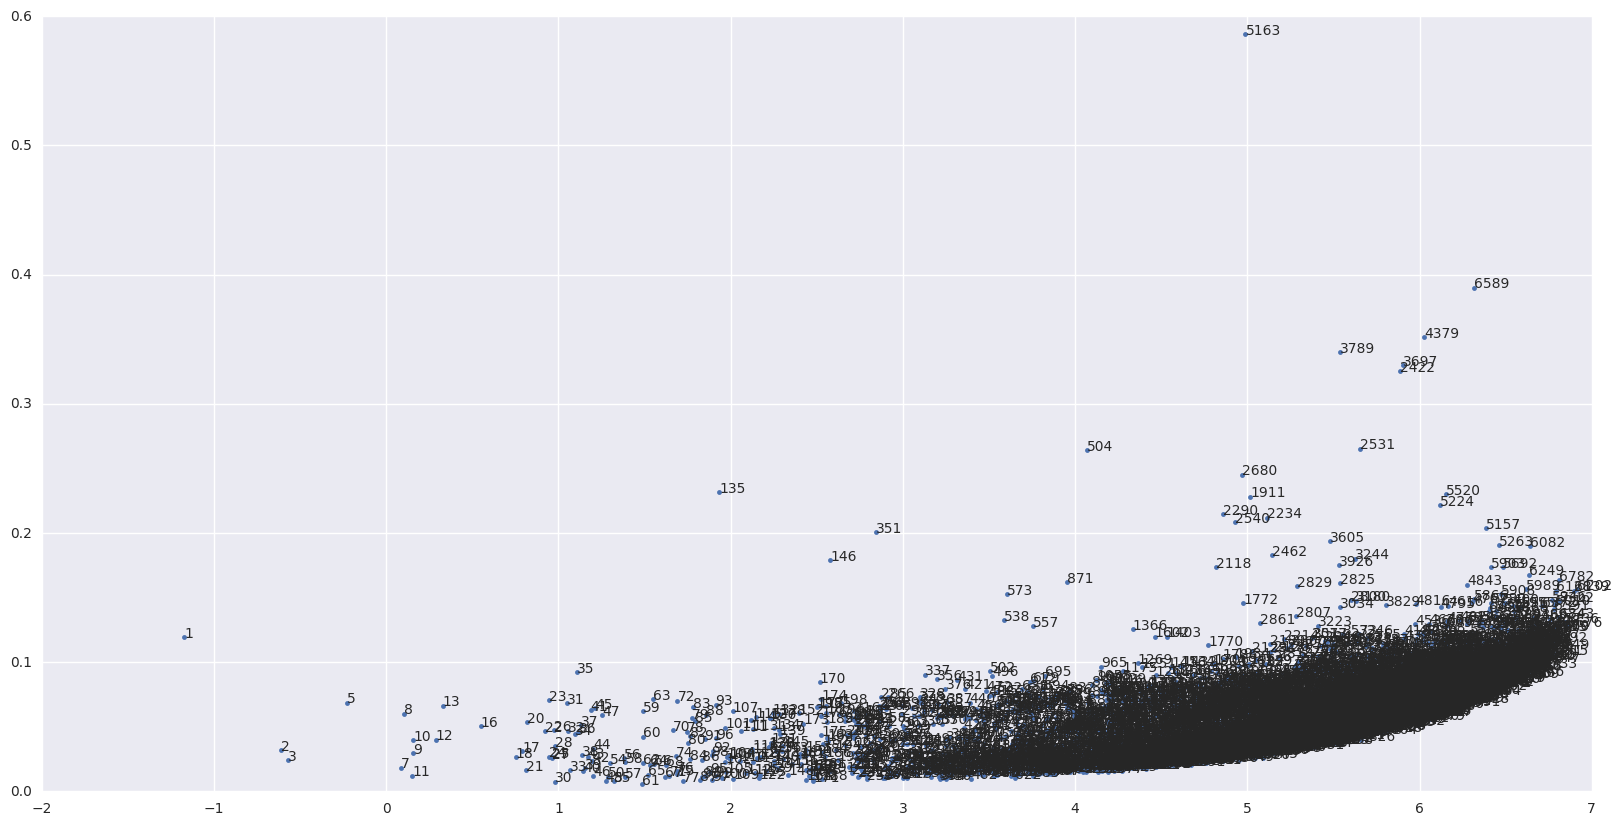

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = df['MEAN_MAG']
y = df['STDEV']
z = df['GOODPOINTS']
realx = x
realy = y
ax.plot(realx, realy, '.')
for i, d in enumerate(x):
    ax.annotate(df['STAR'][i], (realx[i],realy[i]))
print('index 2675 is', df.iloc[2675])


In [5]:
def getBestComparisonStars():
    result = []
    # TODO: filter all stars which have not the maximum of GOODPOINTS
    df_lowest_stdev = df.sort_values('STDEV')
    return df_lowest_stdev.head(10)
    
bestcomps = getBestComparisonStars()
print(bestcomps)
check_stars = []
for index, row in bestcomps.iterrows():
    #print(row, '\n')
    check_stars.append(int(row['STAR']))
check_stars_str = ','.join(map(str, check_stars)) 
print(check_stars_str)

     STAR  MEAN_MAG    STDEV  GOODPOINTS
48     61   1.48797  0.00572         893
23     30   0.98170  0.00738         864
143   171   2.47843  0.00776         889
41     48   1.27522  0.00789         831
64     77   1.72525  0.00791         884
44     55   1.32499  0.00804         841
80     97   1.89205  0.00848         886
72     87   1.82416  0.00864         848
136   164   2.43789  0.00891         796
142   172   2.47665  0.00932         891
61,30,171,48,77,55,97,87,164,172


In [6]:
print(df.iloc[143])

STAR          171.00000
MEAN_MAG        2.47843
STDEV           0.00776
GOODPOINTS    889.00000
Name: 143, dtype: float64


In [ ]:
select_star_list = [143,6394,598,2675,3111,2584]
single_star_list = [598]
star_list = init.all_star_list


In [ ]:
def set_seaborn_style():
    sns.set_context("notebook", font_scale=1.1)
    sns.set_style("ticks")

def read_lightcurve(star):
    print("Reading lightcurve", star)
    df = pd.read_csv(init.lightcurve_dir + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['V-C'] < 99]
    return df

def read_pos(star):
    df = pd.read_csv(init.lightcurve_dir + 'pos_' + str(star) + '.txt', skiprows=[1], sep=' ')
    df = df[df['X'] > 0]
    df = df[df['MAG'] < 99]
    return (df['X'].iloc[1], df['Y'].iloc[1])

def plot_lightcurve(df2, pos, name):
    #insert counting column
    df2.insert(0, 'Count', range(0, len(df2)))
    g = sns.lmplot('Count', 'V-C', 
               data=df2, 
               fit_reg=False)
    plt.title('Star '+ str(name))
    #+ " : " + pixel_to_radec(wcs_config, pos[0], pos[1]).to_string('hmsdms') + ' - ' +str(pos[0]) + ', ' + str(pos[1]))
    plt.xlabel('Obs #')
    plt.ylabel('Mag')    
    plt.gca().invert_yaxis()
    plt.ticklabel_format(style='plain', axis='x')
    plt.figure(figsize=(70,10)) 
    #sns.plt.show()
    g.savefig(init.lightcurve_dir+str(star))
    plt.cla()
    
set_seaborn_style()
try:
    for star in star_list:
        plot_lightcurve(read_lightcurve(star), read_pos(star), star)
except D:
    print("D", D)

Reading lightcurve 1
Reading lightcurve 2
Reading lightcurve 3
Reading lightcurve 4
Reading lightcurve 5
Reading lightcurve 6
Reading lightcurve 7
Reading lightcurve 8
Reading lightcurve 9
Reading lightcurve 10
Reading lightcurve 11


/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Reading lightcurve 12
Reading lightcurve 13
Reading lightcurve 14
Reading lightcurve 15
Reading lightcurve 16
Reading lightcurve 17
Reading lightcurve 18
Reading lightcurve 19
Reading lightcurve 20
Reading lightcurve 21
Reading lightcurve 22
Reading lightcurve 23
Reading lightcurve 24
Reading lightcurve 25
Reading lightcurve 26
Reading lightcurve 27
Reading lightcurve 28
Reading lightcurve 29
Reading lightcurve 30
Reading lightcurve 31
Reading lightcurve 32
Reading lightcurve 33
Reading lightcurve 34
Reading lightcurve 35
Reading lightcurve 36
Reading lightcurve 37
Reading lightcurve 38
Reading lightcurve 39
Reading lightcurve 40
Reading lightcurve 41
Reading lightcurve 42
Reading lightcurve 43
Reading lightcurve 44
Reading lightcurve 45
Reading lightcurve 46
Reading lightcurve 47
Reading lightcurve 48
Reading lightcurve 49
Reading lightcurve 50
Reading lightcurve 51
Reading lightcurve 52
Reading lightcurve 53
Reading lightcurve 54
Reading lightcurve 55
Reading lightcurve 56
Reading li

In [16]:
import upsilon
upsilon.test_predict()

2017-01-22 20:37:02,615 INFO - Read a light curve
2017-01-22 20:37:02,623 INFO -    Before sigma-clipping: 551 data points
2017-01-22 20:37:02,624 INFO -    After sigma-clipping: 551 data points
2017-01-22 20:37:03,308 INFO - Feature extracting time: 0.6843 seconds
2017-01-22 20:37:03,309 INFO - Extracted features. 16 of these, marked with (+) are used to predict a class:
2017-01-22 20:37:03,309 INFO -    (+) amplitude: 0.097430
2017-01-22 20:37:03,310 INFO -    (-) cusum: 0.070156
2017-01-22 20:37:03,310 INFO -    (-) eta: 2.428789
2017-01-22 20:37:03,311 INFO -    (+) hl_amp_ratio: 0.703306
2017-01-22 20:37:03,311 INFO -    (+) kurtosis: -1.197611
2017-01-22 20:37:03,311 INFO -    (-) n_points: 551
2017-01-22 20:37:03,312 INFO -    (+) period: 4.190441
2017-01-22 20:37:03,312 INFO -    (-) period_SNR: 148.150908
2017-01-22 20:37:03,312 INFO -    (-) period_log10FAP: -99.703012
2017-01-22 20:37:03,313 INFO -    (-) period_uncertainty: 0.007102
2017-01-22 20:37:03,313 INFO -    (+) pha

In [15]:
rf_model = upsilon.load_rf_model()
for star in all_star_list:
    try:
        df = read_lightcurve(star)
        mag = df['V-C']
        date = df.index.values
        e_features = upsilon.ExtractFeatures(date, mag)
        e_features.run()
        features = e_features.get_features()

        # Classify the light curve
        label, probability, flag = upsilon.predict(rf_model, features)
        print("star, label, probability, flag")
        print(star, label, probability, flag)
    except:
        print(star, 'error')
    

Reading lightcurve 1
1 error
Reading lightcurve 2
2 error
Reading lightcurve 3
3 error
Reading lightcurve 4
4 error
Reading lightcurve 5
5 error
Reading lightcurve 6
6 error
Reading lightcurve 7
7 error
Reading lightcurve 8
8 error
Reading lightcurve 9
9 error
Reading lightcurve 10
10 error
Reading lightcurve 11
11 error
Reading lightcurve 12
12 error
Reading lightcurve 13
13 error
Reading lightcurve 14
14 error
Reading lightcurve 15
15 error
Reading lightcurve 16
16 error
Reading lightcurve 17
17 error
Reading lightcurve 18
18 error
Reading lightcurve 19
19 error
Reading lightcurve 20
20 error
Reading lightcurve 21
21 error
Reading lightcurve 22
22 error
Reading lightcurve 23
23 error
Reading lightcurve 24
24 error
Reading lightcurve 25
25 error
Reading lightcurve 26
26 error
Reading lightcurve 27
27 error
Reading lightcurve 28
28 error
Reading lightcurve 29
29 error
Reading lightcurve 30
30 error
Reading lightcurve 31
31 error
Reading lightcurve 32
32 error
Reading lightcurve 33
33 e

/opt/conda/lib/python3.5/site-packages/upsilon-1.2.4-py3.5.egg/upsilon/extract_features/extract_features.py:61: UserWarning: The number of data points are less than 80.
  % min_n_data)
